<a href="https://colab.research.google.com/github/EOKELLO/Test-repo/blob/master/Moringa_Data_Science_Core_W9_Independent_Project_2019_07_Elizabeth_Okello_Python_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Research Objective**

To predict whether a passenger survived or not.

to predict whether an email is a spam or not

# **Metric of Success**

create a model of above 80%

ensure data is clean having passed the validity,complete,accurate and uniformity tests


# **Context**

titanic and spam base datasets

# **Experimental design**

In [1]:
load the data

clean the data

perform EDA

create model and evaluate

tune the model

get the insights

SyntaxError: ignored

# **Appropriateness of Data**

All the datasets were relevant for the research objectives

# **Import important Libraries**

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from fancyimpute import KNN
from sklearn.preprocessing import Imputer 
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB


/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
Using TensorFlow backend.


# **Loading the data**

In [0]:
df = pd.read_csv('train_titanic.csv')

In [4]:
#we check our data
#lets check the size
df.shape

(891, 12)

In [5]:
#we check the top rows
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


From the descriptive statistics we can see that a majority of the passengers were between the ages 14 and 43.

In a number of the features there was a presence of variances

# **Exploratory Data Analysis**

Text(0.5, 0, 'survived')

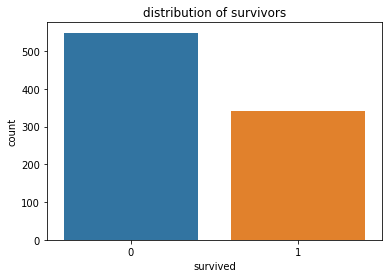

In [7]:
#lets see the distribution of survivors
sns.countplot(x='Survived', data = df)
plt.title('distribution of survivors')
plt.ylabel('count')
plt.xlabel('survived')

From the above plot we can see that the dataset is not balanced and indicates more deaths than survivors

Text(0.5, 0, 'Sex')

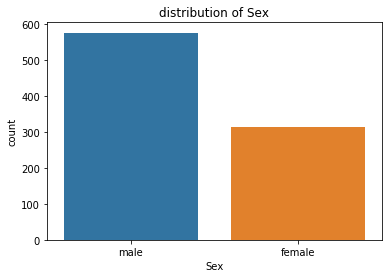

In [8]:
#lets look at the distribution of the sex
sns.countplot(x='Sex', data = df)
plt.title('distribution of Sex')
plt.ylabel('count')
plt.xlabel('Sex')


We can see that from the datasets there were more males than females. over 40% of men more than the females

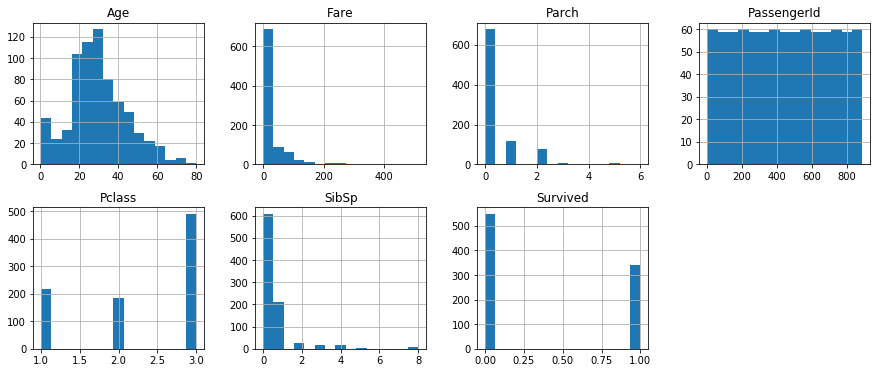

In [9]:
#lets view the distribution
numerical = ['PassengerId','Survived','Pclass','Age','SibSp','Parch','Fare']
df[numerical].hist(bins=15, figsize=(15, 6), layout=(2, 4));

From the above plots we see a high variance in the economic statuses of the passengers represented by the pclass.

we also see a high variance in the fares paid by the different passengers. A majority of the passengers preffered cheaper fares of not more than 100.

most of the passengers were aged between 14 and 43

there were more deaths than survivors represented by survived 1 representing those who survived and 0 representing non survivors.

most of those who survived were of upper class with regard to socio economic status

Text(0.5, 0, 'survived')

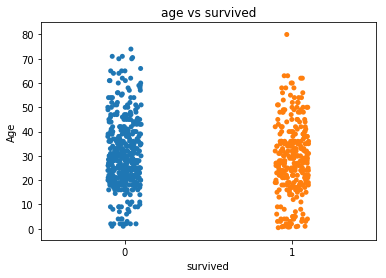

In [10]:
#we want to see how the ages related to the survivor so we put the ages into categories
sns.stripplot(x='Survived', y='Age', data=df)
plt.title('age vs survived')
plt.ylabel('Age')
plt.xlabel('survived')




From the plot above more children below age ten survived compared to those who did not survive. as for those aged between 14 to 43 more died compsred to those who survived.

Text(0.5, 0, 'Pclass')

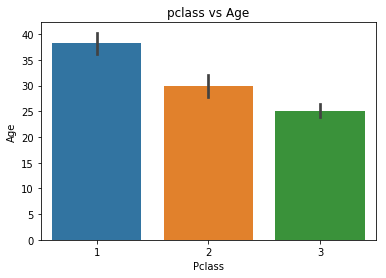

In [11]:
sns.barplot(x='Pclass',y='Age',data = df)
plt.title('pclass vs Age')
plt.ylabel('Age')
plt.xlabel('Pclass')

most of those in upper class are also elderly compared to those in lower class.

Text(0.5, 0, 'Pclass')

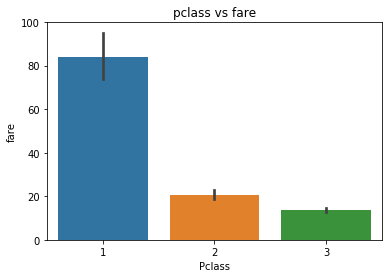

In [12]:
sns.barplot(x='Pclass',y='Fare',data = df)
plt.title('pclass vs fare')
plt.ylabel('fare')
plt.xlabel('Pclass')

Those in upper class also paid more fare.

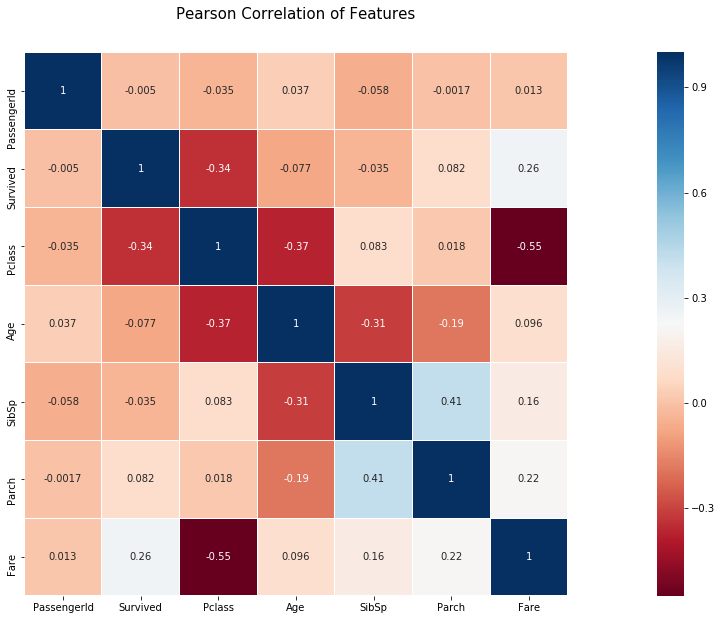

In [13]:
colormap = plt.cm.RdBu
plt.figure(figsize=(32,10))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(df.corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

There exists some correlation between the independent variables though not very strong ones.

we can see a strong correlation between fare and pclass

there is also a moderate correlation between pclass and survived, parch and sibsp

# **DATA CLEANING**

We now want to clean our data and ensure its valid,complete,uniform, consistent and accurate.

**Valid**

In [14]:
#here we remove outliers,drop irrelevant attributes and syntax errors if any
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3-Q1
df2 = df[~((df < (Q1-1.5*IQR))|(df > (Q3+1.5*IQR))).any(axis=1)]
df2.shape

(598, 12)

In [15]:
#there are columns that we dont need so we shall drop them. they include name,passengerid,ticket, Fare 
df2 = df2.drop(['PassengerId', 'Name', 'Ticket', 'Fare','Cabin'],axis=1)
df2.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S
5,0,3,male,NaN,0,0,Q


**Complete**

In [16]:
#check for completeness of the data by checking the missing values
df2.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         149
SibSp         0
Parch         0
Embarked      0
dtype: int64

In [17]:
#we fill in the missing values in age
df2["Age"] = df2["Age"].fillna(df2["Age"].median())
df2.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S
5,0,3,male,29.0,0,0,Q


our dataset is uniform as all the columns and their values have the same names that refer to the same columns and values.


In [18]:
#we now want to convert sex and embarked columns to dummy variables to enable modelling
categorical = ['Sex','Embarked']
dummy = pd.get_dummies(df2[categorical])
dummy.head()

,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,1,0,0,1
2,1,0,0,0,1
3,1,0,0,0,1
4,0,1,0,0,1
5,0,1,0,1,0


In [19]:
#we combine the dummy values with the df2 and drop the original sex and embarked columns
df2 = pd.concat([df2,dummy], axis=1)
df2.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,male,22.0,1,0,S,0,1,0,0,1
2,1,3,female,26.0,0,0,S,1,0,0,0,1
3,1,1,female,35.0,1,0,S,1,0,0,0,1


In [20]:
#we drop the sex and embarked columns
df2.drop(['Sex','Embarked'], axis=1,inplace=True)
df2.head()

,Survived,Pclass,Age,SibSp,Parch,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,0,1,0,0,1
2,1,3,26.0,0,0,1,0,0,0,1
3,1,1,35.0,1,0,1,0,0,0,1
4,0,3,35.0,0,0,0,1,0,0,1
5,0,3,29.0,0,0,0,1,0,1,0


In [21]:
#looking at the above dataframe age has large values we can categorize people in these ages as either adults and children by 
#creating another column to represent the same information.we can call it adults
#adults =1
#children=0
df2['adult'] = 0
df2['adult'][df2["Age"] >= 18] = 1

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [22]:
#we check if this is done successfully
df2.head(2)

,Survived,Pclass,Age,SibSp,Parch,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,adult
0,0,3,22.0,1,0,0,1,0,0,1,1
2,1,3,26.0,0,0,1,0,0,0,1,1


In [23]:
#lets now drop the age column as we have the same information in the column adults
df2.drop(['Age'], axis=1, inplace=True)
df2.tail(3)

,Survived,Pclass,SibSp,Parch,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,adult
887,1,1,0,0,1,0,0,0,1,1
889,1,1,0,0,0,1,1,0,0,1
890,0,3,0,0,0,1,0,1,0,1


In [0]:
#we can now model but first we want to separete our target and predictor variables
y = df2['Survived']
X = df2.drop(['Survived'], axis=1)

In [0]:
#we then split the dataset into train test sets first 80-20,then 70-30 and finally 60-40 and observe our moel performances
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=100 )

In [26]:
#implementation
for K in range(25):
 K_value = K+1
 neigh = KNeighborsClassifier(n_neighbors = K_value, weights='uniform', algorithm='auto')
 neigh.fit(X_train, y_train) 
 y_pred = neigh.predict(X_test)
 print("Accuracy is:" , accuracy_score(y_test,y_pred)*100,"% for K-Value:",K_value)



Accuracy is: 45.0 % for K-Value: 1
Accuracy is: 74.16666666666667 % for K-Value: 2
Accuracy is: 73.33333333333333 % for K-Value: 3
Accuracy is: 76.66666666666667 % for K-Value: 4
Accuracy is: 77.5 % for K-Value: 5
Accuracy is: 76.66666666666667 % for K-Value: 6
Accuracy is: 77.5 % for K-Value: 7
Accuracy is: 76.66666666666667 % for K-Value: 8
Accuracy is: 77.5 % for K-Value: 9
Accuracy is: 77.5 % for K-Value: 10
Accuracy is: 77.5 % for K-Value: 11
Accuracy is: 77.5 % for K-Value: 12
Accuracy is: 77.5 % for K-Value: 13
Accuracy is: 77.5 % for K-Value: 14
Accuracy is: 77.5 % for K-Value: 15
Accuracy is: 78.33333333333333 % for K-Value: 16
Accuracy is: 77.5 % for K-Value: 17
Accuracy is: 78.33333333333333 % for K-Value: 18
Accuracy is: 77.5 % for K-Value: 19
Accuracy is: 78.33333333333333 % for K-Value: 20
Accuracy is: 77.5 % for K-Value: 21
Accuracy is: 77.5 % for K-Value: 22
Accuracy is: 77.5 % for K-Value: 23
Accuracy is: 77.5 % for K-Value: 24
Accuracy is: 76.66666666666667 % for K-Va

In [27]:
confusion_matrix(y_test, y_pred)


array([[78,  5],
       [23, 14]])

In [0]:
#lets split our data in a ratio of 70-30
X1_train,X1_test,y1_train,y1_test = train_test_split(X,y, test_size=0.3, random_state=100 )

In [29]:
for K in range(25):
 K_value = K+1
 neigh1 = KNeighborsClassifier(n_neighbors = K_value, weights='uniform', algorithm='auto')
 neigh1.fit(X1_train, y1_train) 
 y1_pred = neigh.predict(X1_test)
 print("Accuracy is:" , accuracy_score(y1_test,y1_pred)*100,"% for K-Value:",K_value)



Accuracy is: 79.44444444444444 % for K-Value: 1
Accuracy is: 79.44444444444444 % for K-Value: 2
Accuracy is: 79.44444444444444 % for K-Value: 3
Accuracy is: 79.44444444444444 % for K-Value: 4
Accuracy is: 79.44444444444444 % for K-Value: 5
Accuracy is: 79.44444444444444 % for K-Value: 6
Accuracy is: 79.44444444444444 % for K-Value: 7
Accuracy is: 79.44444444444444 % for K-Value: 8
Accuracy is: 79.44444444444444 % for K-Value: 9
Accuracy is: 79.44444444444444 % for K-Value: 10
Accuracy is: 79.44444444444444 % for K-Value: 11
Accuracy is: 79.44444444444444 % for K-Value: 12
Accuracy is: 79.44444444444444 % for K-Value: 13
Accuracy is: 79.44444444444444 % for K-Value: 14
Accuracy is: 79.44444444444444 % for K-Value: 15
Accuracy is: 79.44444444444444 % for K-Value: 16
Accuracy is: 79.44444444444444 % for K-Value: 17
Accuracy is: 79.44444444444444 % for K-Value: 18
Accuracy is: 79.44444444444444 % for K-Value: 19
Accuracy is: 79.44444444444444 % for K-Value: 20
Accuracy is: 79.4444444444444

In [30]:
confusion_matrix(y1_test, y1_pred)


array([[117,   6],
       [ 31,  26]])

In [31]:
print(metrics.classification_report(y1_test, y1_pred))

              precision    recall  f1-score   support

           0       0.79      0.95      0.86       123
           1       0.81      0.46      0.58        57

    accuracy                           0.79       180
   macro avg       0.80      0.70      0.72       180
weighted avg       0.80      0.79      0.78       180



In [0]:
#lastly lets split our data set into 60-40
X2_train,X2_test,y2_train,y2_test = train_test_split(X,y, test_size=0.4, random_state=100 )

In [33]:
for K in range(25):
 K_value = K+1
 neigh2 = KNeighborsClassifier(n_neighbors = K_value, weights='uniform', algorithm='auto')
 neigh2.fit(X2_train, y2_train) 
 y2_pred = neigh.predict(X2_test)
 print("Accuracy is:" , accuracy_score(y2_test,y2_pred)*100,"% for K-Value:",K_value)



Accuracy is: 80.41666666666667 % for K-Value: 1
Accuracy is: 80.41666666666667 % for K-Value: 2
Accuracy is: 80.41666666666667 % for K-Value: 3
Accuracy is: 80.41666666666667 % for K-Value: 4
Accuracy is: 80.41666666666667 % for K-Value: 5
Accuracy is: 80.41666666666667 % for K-Value: 6
Accuracy is: 80.41666666666667 % for K-Value: 7
Accuracy is: 80.41666666666667 % for K-Value: 8
Accuracy is: 80.41666666666667 % for K-Value: 9
Accuracy is: 80.41666666666667 % for K-Value: 10
Accuracy is: 80.41666666666667 % for K-Value: 11
Accuracy is: 80.41666666666667 % for K-Value: 12
Accuracy is: 80.41666666666667 % for K-Value: 13
Accuracy is: 80.41666666666667 % for K-Value: 14
Accuracy is: 80.41666666666667 % for K-Value: 15
Accuracy is: 80.41666666666667 % for K-Value: 16
Accuracy is: 80.41666666666667 % for K-Value: 17
Accuracy is: 80.41666666666667 % for K-Value: 18
Accuracy is: 80.41666666666667 % for K-Value: 19
Accuracy is: 80.41666666666667 % for K-Value: 20
Accuracy is: 80.4166666666666

In [34]:
confusion_matrix(y2_test, y2_pred)


array([[159,   7],
       [ 40,  34]])

In [35]:
print(metrics.classification_report(y2_test, y2_pred))

              precision    recall  f1-score   support

           0       0.80      0.96      0.87       166
           1       0.83      0.46      0.59        74

    accuracy                           0.80       240
   macro avg       0.81      0.71      0.73       240
weighted avg       0.81      0.80      0.78       240



from the above three models the accuracy increases with an increased testing _size or reducing training size.

we also notice that for a smaller training size the value of k does not change the accuracy as the accuracy remains constant throught!

# **Tuning our KNN best model**

In [36]:
knn = KNeighborsClassifier( )
k_range = list(range(1,25))
weights_options = ['uniform','distance']
k_grid = dict(n_neighbors=k_range, weights = weights_options)
grid = GridSearchCV(knn, k_grid, cv=10, scoring = 'precision')
grid.fit(X, y)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='precision', verbose=0)

In [37]:
print ("Best Score: ",str(grid.best_score_))



Best Score:  0.8403097506358376


In [38]:
print ("Best Parameters: ",str(grid.best_params_))


Best Parameters:  {'n_neighbors': 24, 'weights': 'distance'}


In [39]:
print ("Best Estimators: ",str(grid.best_estimator_))


Best Estimators:  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=24, p=2,
                     weights='distance')


In [0]:
# predicting scores

y2_pred = grid.predict(X2_test)

In [108]:
# Calculating Accuracy

acc_clf = metrics.accuracy_score(y2_test,y2_pred)
print ("classifier's accuracy: ",str(acc_clf) )

classifier's accuracy:  0.8166666666666667


In [109]:
confusion_matrix(y2_test, y2_pred)


array([[162,   4],
       [ 40,  34]])

When we tune our best model it yields an accuracy of 82%

The confusion matrix of the tuned model repors better classification as the number of true positives increase and true negatives reduce.

**Predicting survival rate for test_csv values**

In [0]:
#we load the dataset
df_test = pd.read_csv('test_titanic.csv')

In [44]:
df_test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [0]:
#I will need only the values i used in prediction so i drop the ones i dropped earlier
df_test = df_test.drop(['PassengerId', 'Name','Ticket', 'Cabin','Fare' ], axis=1)

In [46]:
df_test.shape

(418, 6)

In [47]:
df_test.isnull().sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Embarked     0
dtype: int64

In [0]:
df_test["Age"] = df_test["Age"].fillna(df_test["Age"].median())


In [49]:
Q1 = df_test.quantile(0.25)
Q3 = df_test.quantile(0.75)
IQR = Q3-Q1
df_clean = df_test[~((df_test < (Q1-1.5*IQR))|(df > (Q3+1.5*IQR))).any(axis=1)]
df_clean.shape

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


(291, 6)

In [0]:
#I created a new column so i create the same here
df_clean['adult']=0
df_clean['adult'][df_clean['Age'] >= 18] = 1


In [51]:
df_clean.head()

,Pclass,Sex,Age,SibSp,Parch,Embarked,adult
0,3,male,34.5,0,0,Q,1
1,3,female,47.0,1,0,S,1
2,2,male,62.0,0,0,Q,1
3,3,male,27.0,0,0,S,1
4,3,female,22.0,1,1,S,1


In [52]:
#we need to drop the  age column and convert the sex and Embarked coolumns to dummies
df_clean.drop(['Age'],axis=1, inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [53]:
cat = ['Sex','Embarked']
dummies = pd.get_dummies(df_clean[cat])
dummies.head(2)

,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,1,0,1,0
1,1,0,0,0,1


In [54]:
#we then combine the dummies
df_clean = pd.concat([df_clean,dummies], axis=1)
df_clean.head()

,Pclass,Sex,SibSp,Parch,Embarked,adult,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,male,0,0,Q,1,0,1,0,1,0
1,3,female,1,0,S,1,1,0,0,0,1
2,2,male,0,0,Q,1,0,1,0,1,0
3,3,male,0,0,S,1,0,1,0,0,1
4,3,female,1,1,S,1,1,0,0,0,1


In [0]:
df_clean.drop(['Sex','Embarked'], axis=1, inplace=True)

In [56]:
# predicting survivals on test set

ytest_pred = grid.predict(df_clean)
ytest_pred

array([1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 1])

In [0]:
df_clean['Survived'] = pd.Series(ytest_pred, index=df_clean.index)

In [58]:
df_clean.head()

,Pclass,SibSp,Parch,adult,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Survived
0,3,0,0,1,0,1,0,1,0,1
1,3,1,0,1,1,0,0,0,1,0
2,2,0,0,1,0,1,0,1,0,1
3,3,0,0,1,0,1,0,0,1,1
4,3,1,1,1,1,0,0,0,1,0


In [0]:
# Exporting predictions as csv
df_clean.to_csv("titanic_pred.csv", encoding='utf-8')

# **Naive Bayes Classifier

In [0]:
#we load the dataset
data = pd.read_csv('spambase.data')

In [61]:
#lets check the data
data.head()

,0,0.64,0.64.1,0.1,0.32,0.2,0.3,0.4,0.5,0.6,0.7,0.64.2,0.8,0.9,0.10,0.32.1,0.11,1.29,1.93,0.12,0.96,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30,0.31,0.32.2,0.33,0.34,0.35,0.36,0.37,0.38,0.39,0.40,0.41,0.42,0.778,0.43,0.44,3.756,61,278,1
0,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0.00,1.59,0.0,0.43,0.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
1,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0.00,1.75,0.06,0.06,1.03,1.36,0.32,0.51,0.0,1.16,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.06,0.0,0.0,0.12,0.0,0.06,0.06,0.0,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
2,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.223,0.0,0.000,0.000,0.000,3.000,15,54,1


looking at the dataset above the target is binary in nature ie spam=1 and not spam=0.

In [91]:
data.describe()

,0,0.64,0.64.1,0.1,0.32,0.2,0.3,0.4,0.5,0.6,0.7,0.64.2,0.8,0.9,0.10,0.32.1,0.11,1.29,1.93,0.12,0.96,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30,0.31,0.32.2,0.33,0.34,0.35,0.36,0.37,0.38,0.39,0.40,0.41,0.42,0.778,0.43,0.44,3.756,61,278,1
count,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,0.104576,0.212922,0.280578,0.065439,0.312222,0.095922,0.114233,0.105317,0.090087,0.239465,0.059837,0.541680,0.093950,0.058639,0.049215,0.248833,0.142617,0.184504,1.662041,0.085596,0.809728,0.121228,0.101667,0.094289,0.549624,0.265441,0.767472,0.124872,0.098937,0.102874,0.064767,0.047059,0.097250,0.047846,0.105435,0.097498,0.136983,0.013204,0.078646,0.064848,0.043676,0.132367,0.046109,0.079213,0.301289,0.179863,0.005446,0.031876,0.038583,0.139061,0.016980,0.268960,0.075827,0.044248,5.191827,52.170870,283.290435,0.393913
std,0.305387,1.290700,0.504170,1.395303,0.672586,0.273850,0.391480,0.401112,0.278643,0.644816,0.201565,0.861791,0.301065,0.335219,0.258871,0.825881,0.444099,0.530930,1.775669,0.509821,1.200938,1.025866,0.350321,0.442681,1.671511,0.887043,3.367639,0.538631,0.593389,0.456729,0.403435,0.328594,0.555966,0.329480,0.532315,0.402664,0.423493,0.220675,0.434718,0.349953,0.361243,0.766900,0.223835,0.622042,1.011787,0.911214,0.076283,0.285765,0.243497,0.270377,0.109406,0.815726,0.245906,0.429388,31.732891,194.912453,606.413764,0.488669
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.310000,0.000000,0.220000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.275500,15.000000,95.000000,0.000000
75%,0.000000,0.000000,0.420000,0.000000,0.382500,0.000000,0.000000,0.000000,0.000000,0.160000,0.000000,0.800000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,2.640000,0.000000,1.270000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,

From the above descriptive statistics we notice an existence of high variances betwen the variables. Because we shall be using naive bayes classifier methods this will not worry us because the naive bayes assumes that each variable is independent .

In [62]:
#we check the size of the dataset
data.shape

(4600, 58)

In [63]:
#lets check for missing values
data.isnull().sum()

0         0
0.64      0
0.64.1    0
0.1       0
0.32      0
0.2       0
0.3       0
0.4       0
0.5       0
0.6       0
0.7       0
0.64.2    0
0.8       0
0.9       0
0.10      0
0.32.1    0
0.11      0
1.29      0
1.93      0
0.12      0
0.96      0
0.13      0
0.14      0
0.15      0
0.16      0
0.17      0
0.18      0
0.19      0
0.20      0
0.21      0
0.22      0
0.23      0
0.24      0
0.25      0
0.26      0
0.27      0
0.28      0
0.29      0
0.30      0
0.31      0
0.32.2    0
0.33      0
0.34      0
0.35      0
0.36      0
0.37      0
0.38      0
0.39      0
0.40      0
0.41      0
0.42      0
0.778     0
0.43      0
0.44      0
3.756     0
61        0
278       0
1         0
dtype: int64

there are no missing values

# **EXPLORATORY DATA ANALYSIS**

Text(0.5, 0, 'spam email')

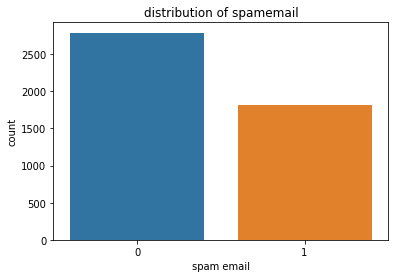

In [95]:
#We take a look at the distribution of the dataset per column
sns.countplot(x='1', data=data)
plt.title('distribution of spamemail')
plt.ylabel('count')
plt.xlabel('spam email')

We see that more non spam emails were present compared to spam emails

Text(0.5, 0, '61 ')

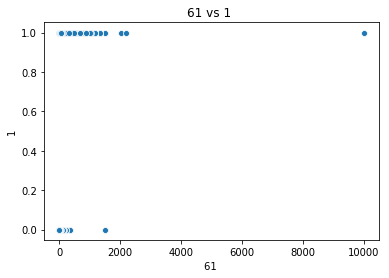

In [102]:
sns.scatterplot(x='61',y='1', data=data)
plt.title('61 vs 1 ')
plt.ylabel('1')
plt.xlabel('61 ')

attribute 61 pointed more to an email being spam as shown in the above plot

Text(0.5, 0, '278 ')

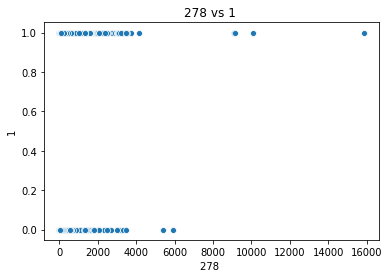

In [103]:
sns.scatterplot(x='278',y='1', data=data)
plt.title('278 vs 1 ')
plt.ylabel('1')
plt.xlabel('278 ')

attribute 278  showed more of spam email.

In [64]:
data.columns

Index(['0', '0.64', '0.64.1', '0.1', '0.32', '0.2', '0.3', '0.4', '0.5', '0.6',
       '0.7', '0.64.2', '0.8', '0.9', '0.10', '0.32.1', '0.11', '1.29', '1.93',
       '0.12', '0.96', '0.13', '0.14', '0.15', '0.16', '0.17', '0.18', '0.19',
       '0.20', '0.21', '0.22', '0.23', '0.24', '0.25', '0.26', '0.27', '0.28',
       '0.29', '0.30', '0.31', '0.32.2', '0.33', '0.34', '0.35', '0.36',
       '0.37', '0.38', '0.39', '0.40', '0.41', '0.42', '0.778', '0.43', '0.44',
       '3.756', '61', '278', '1'],
      dtype='object')

In [0]:
predictors=['0', '0.64', '0.64.1', '0.1', '0.32', '0.2', '0.3', '0.4', '0.5', '0.6',
       '0.7', '0.64.2', '0.8', '0.9', '0.10', '0.32.1', '0.11', '1.29', '1.93',
       '0.12', '0.96', '0.13', '0.14', '0.15', '0.16', '0.17', '0.18', '0.19',
       '0.20', '0.21', '0.22', '0.23', '0.24', '0.25', '0.26', '0.27', '0.28',
       '0.29', '0.30', '0.31', '0.32.2', '0.33', '0.34', '0.35', '0.36',
       '0.37', '0.38', '0.39', '0.40', '0.41', '0.42', '0.778', '0.43', '0.44',
       '3.756', '61', '278']

In [0]:
#we separate the data into target and predictor variables
y = data['1']
X = data[predictors]

In [0]:
#we split the data into train test sets
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.30,random_state=100)

**TRAINING THE THREE CLASSIFIERS USING A TRAIN SIZE OF 70**

In [68]:
#we shall build all the naive_bayes classifier. lets begin with bernoullis
BernNB = BernoulliNB(binarize=True)
BernNB.fit(X_train,y_train)
print(BernNB)
y_expect = y_test
y_predict = BernNB.predict(X_test)
accuracy_score(y_expect,y_predict)

BernoulliNB(alpha=1.0, binarize=True, class_prior=None, fit_prior=True)


0.8536231884057971

In [69]:
confusion_matrix(y_expect,y_predict)

array([[718,  90],
       [112, 460]])

In [70]:
print(metrics.classification_report(y_expect, y_predict))

              precision    recall  f1-score   support

           0       0.87      0.89      0.88       808
           1       0.84      0.80      0.82       572

    accuracy                           0.85      1380
   macro avg       0.85      0.85      0.85      1380
weighted avg       0.85      0.85      0.85      1380



In [71]:
#Lets build a multinomial classifier
MultiNB = MultinomialNB()
MultiNB.fit(X_train,y_train)
print(MultiNB)
y_expect = y_test
y_predict = MultiNB.predict(X_test)
accuracy_score(y_expect,y_predict)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)


0.7855072463768116

In [72]:
confusion_matrix(y_expect,y_predict)

array([[682, 126],
       [170, 402]])

In [73]:
print(metrics.classification_report(y_expect, y_predict))

              precision    recall  f1-score   support

           0       0.80      0.84      0.82       808
           1       0.76      0.70      0.73       572

    accuracy                           0.79      1380
   macro avg       0.78      0.77      0.78      1380
weighted avg       0.78      0.79      0.78      1380



In [74]:
#lets now build a gaussian classifier
GaussNB = GaussianNB()
GaussNB.fit(X_train,y_train)
print(GaussNB)
y_expect = y_test
y_predict = GaussNB.predict(X_test)
accuracy_score(y_expect,y_predict)

GaussianNB(priors=None, var_smoothing=1e-09)


0.8159420289855073

In [75]:
confusion_matrix(y_expect,y_predict)

array([[582, 226],
       [ 28, 544]])

In [76]:
print(metrics.classification_report(y_expect, y_predict))

              precision    recall  f1-score   support

           0       0.95      0.72      0.82       808
           1       0.71      0.95      0.81       572

    accuracy                           0.82      1380
   macro avg       0.83      0.84      0.82      1380
weighted avg       0.85      0.82      0.82      1380



From the above models bernoullis yields the best model because ontop of a high accuracy it also does a few misclassification compared to the other two models according to the confusion matrix 

In [0]:
#lets now change the train set and test set sizes
X3_train,X3_test, y3_train, y3_test = train_test_split(X,y, test_size=0.4, random_state=100)

## TRAINING THE THREE CLASSIFIERS USING A TRAIN SIZE OF 60

In [78]:
#we shall build all the naive_bayes classifier. lets begin with bernoullis
BernNB = BernoulliNB(binarize=True)
BernNB.fit(X3_train,y3_train)
print(BernNB)
y3_expect = y3_test
y3_predict = BernNB.predict(X3_test)
accuracy_score(y3_expect,y3_predict)

BernoulliNB(alpha=1.0, binarize=True, class_prior=None, fit_prior=True)


0.8608695652173913

In [79]:
confusion_matrix(y3_expect,y3_predict)

array([[966, 115],
       [141, 618]])

In [80]:
print(metrics.classification_report(y3_test, y3_predict))

              precision    recall  f1-score   support

           0       0.87      0.89      0.88      1081
           1       0.84      0.81      0.83       759

    accuracy                           0.86      1840
   macro avg       0.86      0.85      0.86      1840
weighted avg       0.86      0.86      0.86      1840



In [81]:
#Lets build a multinomial classifier
MultiNB = MultinomialNB()
MultiNB.fit(X3_train,y3_train)
print(MultiNB)
y3_expect = y3_test
y3_predict = MultiNB.predict(X3_test)
accuracy_score(y3_expect,y3_predict)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)


0.7744565217391305

In [82]:
confusion_matrix(y3_expect,y3_predict)

array([[902, 179],
       [236, 523]])

In [83]:
print(metrics.classification_report(y3_test, y3_predict))

              precision    recall  f1-score   support

           0       0.79      0.83      0.81      1081
           1       0.75      0.69      0.72       759

    accuracy                           0.77      1840
   macro avg       0.77      0.76      0.76      1840
weighted avg       0.77      0.77      0.77      1840



In [84]:
#lets now build a gaussian classifier
GaussNB = GaussianNB()
GaussNB.fit(X3_train,y3_train)
print(GaussNB)
y3_expect = y3_test
y3_predict = GaussNB.predict(X3_test)
accuracy_score(y3_expect,y3_predict)

GaussianNB(priors=None, var_smoothing=1e-09)


0.8190217391304347

In [85]:
confusion_matrix(y3_expect,y3_predict)

array([[780, 301],
       [ 32, 727]])

In [86]:
print(metrics.classification_report(y3_test, y3_predict))

              precision    recall  f1-score   support

           0       0.96      0.72      0.82      1081
           1       0.71      0.96      0.81       759

    accuracy                           0.82      1840
   macro avg       0.83      0.84      0.82      1840
weighted avg       0.86      0.82      0.82      1840



As the training size reduces bernoullis still out preforms the multinomial and gaussian. this is a typical case for bayes classification as it performs better with smaller training sets. 

the accuracy also goes up with a reduced training set and the classification according to the classification matrix bernoullis still yields the best results.

from the classification report we also see bernoullis recording a higher precision, recall and f1_score 

# **Tuning the best model**

In [87]:
#according to our models Bernoullis model is the best. lets try to improve its performance 
#we shall do this by setting the binarize to 0.25 and see the effect on our accuracy and results yielded in the confusion matrix
#we shall build all the naive_bayes classifier. lets begin with bernoullis
BernNB = BernoulliNB(binarize=0.25)
BernNB.fit(X3_train,y3_train)
print(BernNB)
y3_expect = y3_test
y3_predict = BernNB.predict(X3_test)
accuracy_score(y3_expect,y3_predict)

BernoulliNB(alpha=1.0, binarize=0.25, class_prior=None, fit_prior=True)


0.9032608695652173

In [88]:
confusion_matrix(y3_expect,y3_predict)

array([[1007,   74],
       [ 104,  655]])

In [89]:
print(metrics.classification_report(y3_test, y3_predict))

              precision    recall  f1-score   support

           0       0.91      0.93      0.92      1081
           1       0.90      0.86      0.88       759

    accuracy                           0.90      1840
   macro avg       0.90      0.90      0.90      1840
weighted avg       0.90      0.90      0.90      1840



After tuning our model we see the accuracy shooting to 90%

From the confusion matrix the model further performs a better classification .

other metrics like precision, recall and f1_score also increase.